<a href="https://colab.research.google.com/github/gnoejh/ict1022/blob/main/Components/dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Components of Neural Networks

# Dropout

Dropout is a regularization technique used to prevent overfitting in neural networks by randomly setting a fraction of input units to 0 during training.

## How Dropout Works

During training, dropout randomly deactivates a subset of neurons in the network layer. This prevents the network from becoming too reliant on any particular neuron and promotes the development of redundant representations.



---

### Dropout

Dropout is a regularization technique for neural networks that helps prevent overfitting. During training, dropout randomly sets a fraction of the input units to zero at each update of the training phase. This prevents the network from becoming too reliant on any particular neurons and encourages the network to learn more robust features.

#### Mathematical Description

Given a neural network layer with input vector $\mathbf{x}$ and weight matrix $\mathbf{W}$, the output $\mathbf{y}$ without dropout is computed as:

$$
\mathbf{y} = f(\mathbf{W} \mathbf{x} + \mathbf{b})
$$

where:
- $\mathbf{W}$ is the weight matrix
- $\mathbf{b}$ is the bias vector
- $f$ is the activation function

With dropout, a binary mask vector $\mathbf{r}$ is introduced, where each element $r_i$ is drawn from a Bernoulli distribution with parameter $p$ (the probability of keeping a unit active):

$$
r_i \sim \text{Bernoulli}(p)
$$

The input vector $\mathbf{x}$ is then element-wise multiplied by the mask vector $\mathbf{r}$:

$$
\mathbf{x}' = \mathbf{x} \odot \mathbf{r}
$$

The output with dropout is then:

$$
\mathbf{y} = f(\mathbf{W} \mathbf{x}' + \mathbf{b})
$$

During training, the mask $\mathbf{r}$ ensures that only a subset of the neurons are active. During testing, the full network is used, but the weights are scaled by the dropout probability $p$ to account for the fact that more neurons are active:

$$
\mathbf{W}_{\text{test}} = p \mathbf{W}
$$

This scaling ensures that the expected output at test time is the same as the expected output during training.

---


## Implementing Dropout in PyTorch

In PyTorch, dropout can be easily implemented using the `nn.Dropout` layer. Here's a simple example:

In [1]:
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

## Benefits of Using Dropout

- **Reduces Overfitting:** By preventing complex co-adaptations, dropout helps the model generalize better.
- **Improves Robustness:** Models become less sensitive to the presence or absence of specific neurons.
- **Easy to Implement:** Dropout layers can be seamlessly integrated into existing neural network architectures.
- **Supports user-defined dropout probability:** Additional bullet.

Training Model Without Dropout
Training Model With Dropout


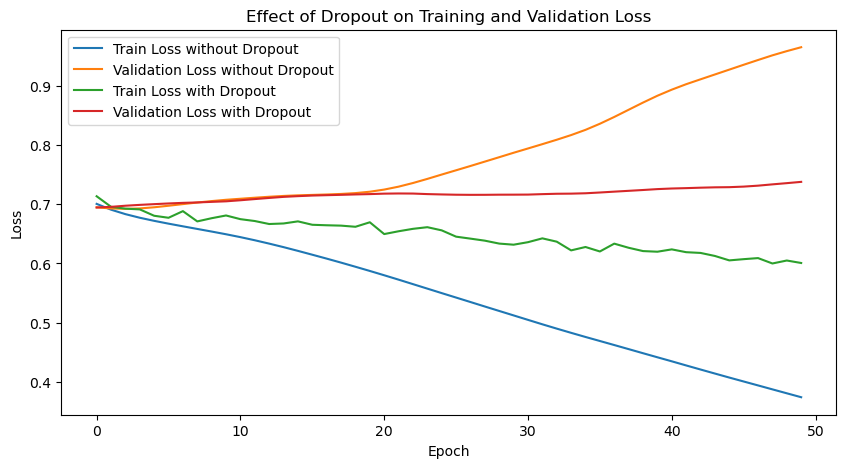

In [2]:
# Comparing Models with and without Dropout
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Sample dataset
X = torch.randn(1000, 20)
y = torch.randint(0, 2, (1000, 1)).float()

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
class ModelWithoutDropout(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ModelWithoutDropout, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

class ModelWithDropout(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout_p=0.5):
        super(ModelWithDropout, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_p)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out

# Training function
def train_model(model, X_train, y_train, X_val, y_val, epochs=50, lr=0.01):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
        
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            val_losses.append(val_loss.item())
    
    return train_losses, val_losses

# Initialize models
input_dim = 20
hidden_dim = 50
output_dim = 1

model_without_dropout = ModelWithoutDropout(input_dim, hidden_dim, output_dim)
model_with_dropout = ModelWithDropout(input_dim, hidden_dim, output_dim, dropout_p=0.5)

# Train models
epochs = 50

print('Training Model Without Dropout')
train_loss_no_dropout, val_loss_no_dropout = train_model(model_without_dropout, X_train, y_train, X_val, y_val, epochs)

print('Training Model With Dropout')
train_loss_dropout, val_loss_dropout = train_model(model_with_dropout, X_train, y_train, X_val, y_val, epochs)

# Plot losses
plt.figure(figsize=(10,5))
plt.plot(range(epochs), train_loss_no_dropout, label='Train Loss without Dropout')
plt.plot(range(epochs), val_loss_no_dropout, label='Validation Loss without Dropout')
plt.plot(range(epochs), train_loss_dropout, label='Train Loss with Dropout')
plt.plot(range(epochs), val_loss_dropout, label='Validation Loss with Dropout')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Effect of Dropout on Training and Validation Loss')
plt.legend()
plt.show()